In [2]:
import tweepy
import pandas as pd
import numpy as np
import json 
import re
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [225]:
#Authentication information
consumer_key = "Your consumer key"
consumer_secret = "Your consumer secret key"
access_token= "Your access key"
access_secret = "Your access secret key"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [226]:
# tim_tweets = tweepy.Cursor(api.search_tweets, q = "Tim Hortons OR tim hortons OR Timmies OR timmies OR Tim hortons -filter:retweets", lang = "en", tweet_mode='extended').items(15000)
# tim_list = [[tweet.created_at, tweet.place, tweet.user.name, tweet.full_text] for tweet in tim_tweets]
# tims_df = pd.DataFrame(tim_list)
# tims_df.columns = ['Created at', 'Place', 'User', 'Text']
# tims_df.to_csv('timtweets.csv', index=False) # Save to CSV file for later access without having to run query again
# tims_df

In [65]:
tims_df = pd.read_csv('timtweets.csv')
tims_df

,Created at,Place,User,Text
0,2022-12-06 22:10:19+00:00,NaN,Drea’s Vintage Emporium,Check out this listing I just added to my #Pos...
1,2022-12-06 22:10:11+00:00,NaN,Julia A Redmond,@NS_scooke The inside of a Tim Hortons coffee ...
2,2022-12-06 22:09:47+00:00,NaN,vic | SAW ATEEZ! ❤,I have concluded that since Ateez isn't giving...
3,2022-12-06 22:09:35+00:00,NaN,Drea’s Vintage Emporium,Check out this listing I just added to my #Pos...
4,2022-12-06 22:01:49+00:00,NaN,Louis Brier,Our 2022 WINTER STAFF &amp; COMPANIONS APPRECI...
...,...,...,...,...
2310,2022-11-27 19:33:55+00:00,NaN,nat ☽,@clairo i’ll give you poutine and tim hortons 😍
2311,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...
2312,2022-11-27 19:25:52+00:00,NaN,amias !! 🎄❄️,@thesignofholmes off topic but currywurst is s...
2313,2022-11-27 19:25:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Thomas McCauley,"I'm at Tim Hortons in Saint John, NB https://t..."


In [122]:
places_df = tims_df.loc[tims_df.Place.notnull()]
places_df.reset_index(drop=True,inplace=True)
places_df

,Created at,Place,User,Text,Clean_Text,Sentiment,pos,neu,neg,compound,Cleaned minus keyword,tokenized,no stopwords,lemmatized,final
0,2022-12-06 18:43:35+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Zach,@cynthiaquillman Ohhhh interesting! I miss the...,Ohhhh interesting! I miss the Tim Hortons gin...,positive,0.282,0.566,0.151,0.3382,ohhhh interesting! i miss the gingerbread men,"[, ohhhh, interesting, i, miss, the, gingerbre...","[, ohhhh, interesting, miss, gingerbread, men]","[, ohhhh, interesting, miss, gingerbread, men]",ohhhh interesting miss gingerbread men
1,2022-12-06 15:45:25+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,VictorRodriguezLuis,#BuenDia #Martes #Coffe en Tim Hortons https:/...,en Tim Hortons,neutral,0.000,1.000,0.000,0.0000,en,"[, en, ]","[, en, ]","[, en, ]",en
2,2022-12-06 14:15:45+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,.,I like Tim Hortons but smelling like i stepped...,I like Tim Hortons but smelling like i stepped...,positive,0.312,0.688,0.000,0.6124,i like but smelling like i stepped in a check...,"[i, like, but, smelling, like, i, stepped, in,...","[like, smelling, like, stepped, checkin, shop]","[like, smelling, like, stepped, checkin, shop]",like smelling like stepped checkin shop
3,2022-12-06 13:51:56+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Cambrian College,"To mark the occasion, free ribbons are availab...",To mark the occasion free ribbons are availabl...,positive,0.109,0.891,0.000,0.5106,to mark the occasion free ribbons are availabl...,"[to, mark, the, occasion, free, ribbons, are, ...","[mark, occasion, free, ribbons, available, mai...","[mark, occasion, free, ribbon, available, main...",mark occasion free ribbon available main entra...
4,2022-12-06 09:07:38+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,John C. Bailey,@IAmBirgitta What's wrong with the years suppl...,Whats wrong with the years supply worth of do...,positive,0.279,0.598,0.124,0.4404,whats wrong with the years supply worth of do...,"[, whats, wrong, with, the, years, supply, wor...","[, whats, wrong, years, supply, worth, donuts,...","[, whats, wrong, year, supply, worth, donut, o...",whats wrong year supply worth donut oh yeah l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2022-11-28 11:35:38+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Victoria Stewart 🏒⚾️🏴󠁧󠁢󠁳󠁣󠁴󠁿,@SimonDingleyTV @lindsayisabel Welcome to Scot...,Welcome to Scotland! I can’t wait for one to...,positive,0.155,0.845,0.000,0.5093,welcome to scotland! i can’t wait for one to...,"[, welcome, to, scotland, i, can, t, wait, for...","[, welcome, scotland, wait, one, open, dundee,...","[, welcome, scotland, wait, one, open, dundee,...",welcome scotland wait one open dundee hometown
67,2022-11-27 21:34:13+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Micheal Ritchie,@MartinDoyle617 @CheriDiNovo Not much differen...,Not much difference they do not pay on gross...,positive,0.116,0.884,0.000,0.5334,not much difference they do not pay on gross...,"[, not, much, difference, they, do, not, pay, ...","[, much, difference, pay, gross, income, even,...","[, much, difference, pay, gross, income, even,...",much difference pay gross income even net inc...
68,2022-11-27 21:18:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Ashley Fox RPN,@VictorFedeli @TimHortonsIndia Tim Hortons isn...,Tim Hortons isnt Ontarian anymore Vic,neutral,0.000,1.000,0.000,0.0000,isnt ontarian anymore vic,"[, isnt, ontarian, anymore, vic]","[, isnt, ontarian, anymore, vic]","[, isnt, ontarian, anymore, vic]",isnt ontarian anymore vic
69,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...,Happy Holidays! Gingerbread Chocolate Dream Do...,positive,0.589,0.411,0.000,0.8221,happy holidays! gingerbread chocolate dream do...,"[happy, holidays, gingerbread, chocolate, drea...","[happy, holidays, gingerbre

In [124]:
def get_city(text):
  city = text.split("full_name='")[1].split("country_code")[0][:-3]
  return city

def get_country(text):
  country = text.split("country='")[1].split("'")[0]
  return country

places_df['city'] = places_df.Place.apply(get_city)
places_df['country'] = places_df.Place.apply(get_country)
places_df.country.value_counts()

c:\users\nam\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\nam\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Canada                         38
United States                  16
United Kingdom                  5
Kuwait                          3
Republic of the Philippines     3
Mexico                          2
Kingdom of Saudi Arabia         2
Czech Republic                  1
France                          1
Name: country, dtype: int64

<AxesSubplot:>

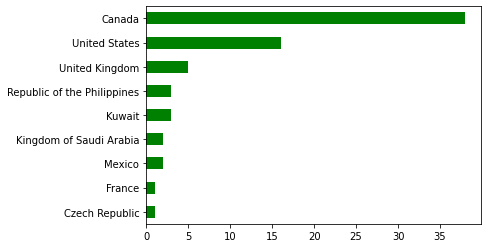

In [125]:
places_df.country.value_counts().sort_values().plot(kind='barh', color='g')

In [70]:
def get_hashtags(text):    
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', text)
  
tims_df['hashtags'] = tims_df.Text.apply(get_hashtags) # Create a hashtags column for tweets with hashtags
tims_df

,Created at,Place,User,Text,hashtags
0,2022-12-06 22:10:19+00:00,NaN,Drea’s Vintage Emporium,Check out this listing I just added to my #Pos...,"[#Poshmark, #shopmycloset]"
1,2022-12-06 22:10:11+00:00,NaN,Julia A Redmond,@NS_scooke The inside of a Tim Hortons coffee ...,[]
2,2022-12-06 22:09:47+00:00,NaN,vic | SAW ATEEZ! ❤,I have concluded that since Ateez isn't giving...,[]
3,2022-12-06 22:09:35+00:00,NaN,Drea’s Vintage Emporium,Check out this listing I just added to my #Pos...,"[#Poshmark, #shopmycloset]"
4,2022-12-06 22:01:49+00:00,NaN,Louis Brier,Our 2022 WINTER STAFF &amp; COMPANIONS APPRECI...,[]
...,...,...,...,...,...
2310,2022-11-27 19:33:55+00:00,NaN,nat ☽,@clairo i’ll give you poutine and tim hortons 😍,[]
2311,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...,"[#timhortons, #timhortonscanada, #donuts, #don..."
2312,2022-11-27 19:25:52+00:00,NaN,amias !! 🎄❄️,@thesignofholmes off topic but currywurst is s...,[]
2313,2022-11-27 19:25:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Thomas McCauley,"I'm at Tim Hortons in Saint John, NB https://t...",[]


In [71]:
hashtags = tims_df['hashtags'].to_list()
hashtags_df = pd.DataFrame([item for sublist in hashtags for item in sublist])
hashtags_df.columns = ['Hashtags']
hashtags_df.Hashtags.value_counts()
tims_df.drop('hashtags', axis = 1, inplace=True)


,Created at,Place,User,Text
0,2022-12-06 22:10:19+00:00,NaN,Drea’s Vintage Emporium,Check out this listing I just added to my #Pos...
1,2022-12-06 22:10:11+00:00,NaN,Julia A Redmond,@NS_scooke The inside of a Tim Hortons coffee ...
2,2022-12-06 22:09:47+00:00,NaN,vic | SAW ATEEZ! ❤,I have concluded that since Ateez isn't giving...
3,2022-12-06 22:09:35+00:00,NaN,Drea’s Vintage Emporium,Check out this listing I just added to my #Pos...
4,2022-12-06 22:01:49+00:00,NaN,Louis Brier,Our 2022 WINTER STAFF &amp; COMPANIONS APPRECI...
...,...,...,...,...
2310,2022-11-27 19:33:55+00:00,NaN,nat ☽,@clairo i’ll give you poutine and tim hortons 😍
2311,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...
2312,2022-11-27 19:25:52+00:00,NaN,amias !! 🎄❄️,@thesignofholmes off topic but currywurst is s...
2313,2022-11-27 19:25:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Thomas McCauley,"I'm at Tim Hortons in Saint John, NB https://t..."


In [72]:
tims_df = tims_df.drop(tims_df[tims_df['Text'].str.contains('Poshmark')].index)
tims_df = tims_df.drop(tims_df[tims_df['Text'].str.contains('eBay')].index)
tims_df = tims_df.drop(tims_df[tims_df['Text'].str.contains('Kanye')].index)
tims_df = tims_df.drop(tims_df[tims_df['Text'].str.contains('sportscards')].index)
tims_df = tims_df.drop(tims_df[tims_df['Text'].str.contains('Amazon')].index)

,Created at,Place,User,Text
1,2022-12-06 22:10:11+00:00,NaN,Julia A Redmond,@NS_scooke The inside of a Tim Hortons coffee ...
2,2022-12-06 22:09:47+00:00,NaN,vic | SAW ATEEZ! ❤,I have concluded that since Ateez isn't giving...
4,2022-12-06 22:01:49+00:00,NaN,Louis Brier,Our 2022 WINTER STAFF &amp; COMPANIONS APPRECI...
5,2022-12-06 21:50:32+00:00,NaN,momo lovemail ☃️❣️,@aiutism YEYSYEYSYS i cant vouch for how good ...
6,2022-12-06 21:50:02+00:00,NaN,🇨🇦 James Barnes 🇨🇦,@Jaide_Alicia we have a restaurant chain up he...
...,...,...,...,...
2310,2022-11-27 19:33:55+00:00,NaN,nat ☽,@clairo i’ll give you poutine and tim hortons 😍
2311,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...
2312,2022-11-27 19:25:52+00:00,NaN,amias !! 🎄❄️,@thesignofholmes off topic but currywurst is s...
2313,2022-11-27 19:25:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Thomas McCauley,"I'm at Tim Hortons in Saint John, NB https://t..."


In [ ]:
tims_df['hashtags'] = tweets_df.Text.apply(find_hashtags)

hashtags = tweets_df['hashtags'].to_list()
hashtags_df = pd.DataFrame([item for sublist in hashtags for item in sublist])
hashtags_df.columns = ['Hashtags']
hashtags_df.Hashtags.value_counts()[:10].plot(kind='barh', color='g')
tims_df.drop('hashtags', axis = 1, inplace=True)

In [73]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # Remove mentions
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # Remove hashtags
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text) # Remove links
    text = text.translate(str.maketrans('', '', string.punctuation[1:]))
    return text
tims_df['Clean_Text'] = tims_df['Text'].apply(clean_text)

In [74]:
tims_df

,Created at,Place,User,Text,Clean_Text
1,2022-12-06 22:10:11+00:00,NaN,Julia A Redmond,@NS_scooke The inside of a Tim Hortons coffee ...,The inside of a Tim Hortons coffee cup after ...
2,2022-12-06 22:09:47+00:00,NaN,vic | SAW ATEEZ! ❤,I have concluded that since Ateez isn't giving...,I have concluded that since Ateez isnt giving ...
4,2022-12-06 22:01:49+00:00,NaN,Louis Brier,Our 2022 WINTER STAFF &amp; COMPANIONS APPRECI...,Our 2022 WINTER STAFF amp COMPANIONS APPRECIAT...
5,2022-12-06 21:50:32+00:00,NaN,momo lovemail ☃️❣️,@aiutism YEYSYEYSYS i cant vouch for how good ...,YEYSYEYSYS i cant vouch for how good uk tim h...
6,2022-12-06 21:50:02+00:00,NaN,🇨🇦 James Barnes 🇨🇦,@Jaide_Alicia we have a restaurant chain up he...,we have a restaurant chain up here in Canada ...
...,...,...,...,...,...
2310,2022-11-27 19:33:55+00:00,NaN,nat ☽,@clairo i’ll give you poutine and tim hortons 😍,i’ll give you poutine and tim hortons 😍
2311,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...,Happy Holidays! Gingerbread Chocolate Dream Do...
2312,2022-11-27 19:25:52+00:00,NaN,amias !! 🎄❄️,@thesignofholmes off topic but currywurst is s...,off topic but currywurst is so good like i ha...
2313,2022-11-27 19:25:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Thomas McCauley,"I'm at Tim Hortons in Saint John, NB https://t...",Im at Tim Hortons in Saint John NB


In [75]:
for index, row in tims_df['Clean_Text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['pos'] > score['neg']:
        tims_df.loc[index, "Sentiment"] = "positive"
    elif score['neg'] > score['pos']:
        tims_df.loc[index, "Sentiment"] = "negative"
    else:
        tims_df.loc[index, "Sentiment"] = "neutral"
        
    tims_df.loc[index, 'pos'] = score['pos']
    tims_df.loc[index, 'neu'] = score['neu']
    tims_df.loc[index, 'neg'] = score['neg']
    tims_df.loc[index, 'compound'] = score['compound']
    
tims_df

,Created at,Place,User,Text,Clean_Text,Sentiment,pos,neu,neg,compound
1,2022-12-06 22:10:11+00:00,NaN,Julia A Redmond,@NS_scooke The inside of a Tim Hortons coffee ...,The inside of a Tim Hortons coffee cup after ...,neutral,0.000,1.000,0.000,0.0000
2,2022-12-06 22:09:47+00:00,NaN,vic | SAW ATEEZ! ❤,I have concluded that since Ateez isn't giving...,I have concluded that since Ateez isnt giving ...,negative,0.083,0.799,0.118,-0.0634
4,2022-12-06 22:01:49+00:00,NaN,Louis Brier,Our 2022 WINTER STAFF &amp; COMPANIONS APPRECI...,Our 2022 WINTER STAFF amp COMPANIONS APPRECIAT...,positive,0.333,0.667,0.000,0.9378
5,2022-12-06 21:50:32+00:00,NaN,momo lovemail ☃️❣️,@aiutism YEYSYEYSYS i cant vouch for how good ...,YEYSYEYSYS i cant vouch for how good uk tim h...,positive,0.132,0.868,0.000,0.4404
6,2022-12-06 21:50:02+00:00,NaN,🇨🇦 James Barnes 🇨🇦,@Jaide_Alicia we have a restaurant chain up he...,we have a restaurant chain up here in Canada ...,negative,0.000,0.849,0.151,-0.5994
...,...,...,...,...,...,...,...,...,...,...
2310,2022-11-27 19:33:55+00:00,NaN,nat ☽,@clairo i’ll give you poutine and tim hortons 😍,i’ll give you poutine and tim hortons 😍,neutral,0.000,1.000,0.000,0.0000
2311,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...,Happy Holidays! Gingerbread Chocolate Dream Do...,positive,0.589,0.411,0.000,0.8221
2312,2022-11-27 19:25:52+00:00,NaN,amias !! 🎄❄️,@thesignofholmes off topic but currywurst is s...,off topic but currywurst is so good like i ha...,positive,0.385,0.615,0.000,0.8683
2313,2022-11-27 19:25:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Thomas McCauley,"I'm at Tim Hortons in Saint John, NB https://t...",Im at Tim Hortons in Saint John NB,neutral,0.000,1.000,0.000,0.0000


In [76]:
totals = tims_df['Sentiment'].value_counts()
percent =round(100*tims_df['Sentiment'].value_counts(normalize=True),2)
countdf = pd.concat([totals,percent], axis = 1, keys = ['Count','Percentage'])
countdf

,Count,Percentage
positive,888,39.48
neutral,844,37.53
negative,517,22.99


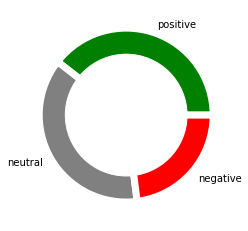

In [77]:
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(countdf.Percentage, labels=countdf.index, colors=['green','grey','red'], wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

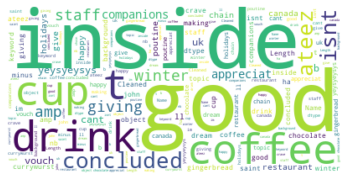

In [97]:
tims_df['Cleaned minus keyword'] = tims_df['Clean_Text'].apply(lambda x: x.lower().replace('tim hortons',''))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", max_words = 3000, stopwords = stopwords, repeat = True)
wc.generate(str(tims_df['Cleaned minus keyword']))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [99]:
pos_df = tims_df.loc[tims_df.Sentiment == 'positive']
neu_df = tims_df.loc[tims_df.Sentiment == 'neutral']
neg_df = tims_df.loc[tims_df.Sentiment == 'negative']

In [259]:
# examples of mislabelled sentiment tweets
# https://twitter.com/ant1quity/status/1597376074958008320
# https://twitter.com/ellulie_/status/1598002803917848576

In [104]:
neg_df.sort_values(by='neg', ascending=False).head(20)

,Created at,Place,User,Text,Clean_Text,Sentiment,pos,neu,neg,compound,Cleaned minus keyword
2023,2022-11-28 21:00:51+00:00,NaN,Payton,@DezaraeBlakely Fuck Tim Hortons 😂,Fuck Tim Hortons 😂,negative,0.000,0.364,0.636,-0.5423,fuck 😂
1748,2022-11-30 00:42:54+00:00,NaN,lumi,fuck tim hortons,fuck tim hortons,negative,0.000,0.364,0.636,-0.5423,fuck
506,2022-12-04 19:26:01+00:00,NaN,Matt Dagley,A murder at Tim Hortons. https://t.co/nD29S3wJhG,A murder at Tim Hortons,negative,0.000,0.390,0.610,-0.6908,a murder at
666,2022-12-04 04:21:32+00:00,NaN,miss k 💖🐰🐹💜,no tim hortons here im devastated...,no tim hortons here im devastated,negative,0.000,0.392,0.608,-0.7351,no here im devastated
1120,2022-12-02 13:39:23+00:00,NaN,Sergei Bobrovsky,@TimHortons @ryantaylor33 No problem at the Fl...,No problem at the Florida Tim hortons Must b...,negative,0.000,0.417,0.583,-0.8807,no problem at the florida must be a shitty ...
754,2022-12-03 21:30:17+00:00,NaN,pisces’s groove,Tim Hortons got some bomb ass pussy,Tim Hortons got some bomb ass pussy,negative,0.000,0.427,0.573,-0.7717,got some bomb ass pussy
1511,2022-11-30 21:56:34+00:00,NaN,quin 🦇🫧,bad day i was accidentally rude to the tim hor...,bad day i was accidentally rude to the tim hor...,negative,0.000,0.440,0.560,-0.8360,bad day i was accidentally rude to the worker
983,2022-12-02 22:03:17+00:00,NaN,"🔞Linen, theGoblinBurrows",@BrianTheGoblin @DholeOlivia @VirtualKohai No ...,No no Livs right Tim Hortons is a ruin thes...,negative,0.000,0.461,0.539,-0.8020,no no livs right is a ruin these days
2199,2022-11-28 04:32:29+00:00,NaN,countryrose,"If I can boycot Tim Hortons, I have no problem...",If I can boycot Tim Hortons I have no problem ...,negative,0.000,0.479,0.521,-0.7650,if i can boycot i have no problem boycotting ...
1035,2022-12-02 18:54:48+00:00,NaN,sandra ♡,idk how bitches live w/o tim hortons,idk how bitches live wo tim hortons,negative,0.000,0.485,0.515,-0.6486,idk how bitches live wo


In [106]:
pos_df.sort_values(by='pos', ascending=False).head(20)

,Created at,Place,User,Text,Clean_Text,Sentiment,pos,neu,neg,compound,Cleaned minus keyword
865,2022-12-03 12:54:58+00:00,NaN,Hallowed Be Thy Game,@gamebols @superjude81 @MintBlais Fun! I love ...,Fun! I love Tim Hortons!,positive,0.802,0.198,0.0,0.8436,fun! i love !
1438,2022-12-01 04:05:25+00:00,NaN,Sid G,#Burnley Welcomes #Canada for coffee\nCongratu...,Welcomes for coffee\nCongratulations \n,positive,0.767,0.233,0.0,0.7650,welcomes for coffee\ncongratulations \n
648,2022-12-04 05:53:38+00:00,NaN,coldpr,@A__________by_A Tim Hortons XD,Tim Hortons XD,positive,0.694,0.306,0.0,0.6739,xd
542,2022-12-04 17:31:09+00:00,NaN,jamie,i love tim hortons,i love tim hortons,positive,0.677,0.323,0.0,0.6369,i love
844,2022-12-03 15:03:30+00:00,NaN,robbie,Tim Hortons:\n\nBest coffee ✅ \nBest customer ...,Tim Hortons\n\nBest coffee ✅ \nBest customer s...,positive,0.677,0.323,0.0,0.9274,\n\nbest coffee ✅ \nbest customer service ✅ \n...
1193,2022-12-02 03:25:57+00:00,NaN,mary 🫶🏻🏠🍒 IS SEEING HARRY TWICE????,i love tim hortons,i love tim hortons,positive,0.677,0.323,0.0,0.6369,i love
486,2022-12-04 21:30:41+00:00,NaN,Carbs,Celebrating the England win with a Tim Hortons...,Celebrating the England win with a Tim Hortons...,positive,0.673,0.327,0.0,0.8834,celebrating the england win with a lol
1919,2022-11-29 14:17:37+00:00,NaN,King Default 👑,@tinycanadianxo True Tim Hortons is the best,True Tim Hortons is the best,positive,0.636,0.364,0.0,0.7906,true is the best
1619,2022-11-30 14:28:47+00:00,NaN,LORIE,Win a $50 Tim Hortons Gift Card https://t.co/B...,Win a 50 Tim Hortons Gift Card,positive,0.626,0.374,0.0,0.7717,win a 50 gift card
1542,2022-11-30 19:26:32+00:00,NaN,cami🌊,@cluvshyunjin i LOVE tim hortons omg,i LOVE tim hortons omg,positive,0.622,0.378,0.0,0.7125,i love omg


In [263]:
# thoughts -- a good amount of negatively labelled tweets are mislabeled it seems

In [114]:
# I want to find word counts/frequencies next

def tokenize(text):
    text = re.split('\W+', text)
    return text
tims_df['tokenized'] = tims_df['Cleaned minus keyword'].apply(lambda x: tokenize(x.lower()))

# Remove stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tims_df['no stopwords'] = tims_df['tokenized'].apply(lambda x: remove_stopwords(x))

# Lemmatize
wnl = nltk.WordNetLemmatizer()
def lemmatize(text):
    text = [wnl.lemmatize(word) for word in text]
    return text
tims_df['lemmatized'] = tims_df['no stopwords'].apply(lambda x: lemmatize(x))
tims_df['final'] = tims_df['lemmatized'].apply(lambda x: ' '.join(x))
tims_df

,Created at,Place,User,Text,Clean_Text,Sentiment,pos,neu,neg,compound,Cleaned minus keyword,tokenized,no stopwords,lemmatized,final
1,2022-12-06 22:10:11+00:00,NaN,Julia A Redmond,@NS_scooke The inside of a Tim Hortons coffee ...,The inside of a Tim Hortons coffee cup after ...,neutral,0.000,1.000,0.000,0.0000,the inside of a coffee cup after you drink t...,"[, the, inside, of, a, coffee, cup, after, you...","[, inside, coffee, cup, drink, coffee]","[, inside, coffee, cup, drink, coffee]",inside coffee cup drink coffee
2,2022-12-06 22:09:47+00:00,NaN,vic | SAW ATEEZ! ❤,I have concluded that since Ateez isn't giving...,I have concluded that since Ateez isnt giving ...,negative,0.083,0.799,0.118,-0.0634,i have concluded that since ateez isnt giving ...,"[i, have, concluded, that, since, ateez, isnt,...","[concluded, since, ateez, isnt, giving, us, th...","[concluded, since, ateez, isnt, giving, u, tha...",concluded since ateez isnt giving u thank cana...
4,2022-12-06 22:01:49+00:00,NaN,Louis Brier,Our 2022 WINTER STAFF &amp; COMPANIONS APPRECI...,Our 2022 WINTER STAFF amp COMPANIONS APPRECIAT...,positive,0.333,0.667,0.000,0.9378,our 2022 winter staff amp companions appreciat...,"[our, 2022, winter, staff, amp, companions, ap...","[2022, winter, staff, amp, companions, appreci...","[2022, winter, staff, amp, companion, apprecia...",2022 winter staff amp companion appreciation d...
5,2022-12-06 21:50:32+00:00,NaN,momo lovemail ☃️❣️,@aiutism YEYSYEYSYS i cant vouch for how good ...,YEYSYEYSYS i cant vouch for how good uk tim h...,positive,0.132,0.868,0.000,0.4404,yeysyeysys i cant vouch for how good uk is b...,"[, yeysyeysys, i, cant, vouch, for, how, good,...","[, yeysyeysys, cant, vouch, good, uk, bc, orig...","[, yeysyeysys, cant, vouch, good, uk, bc, orig...",yeysyeysys cant vouch good uk bc originally l...
6,2022-12-06 21:50:02+00:00,NaN,🇨🇦 James Barnes 🇨🇦,@Jaide_Alicia we have a restaurant chain up he...,we have a restaurant chain up here in Canada ...,negative,0.000,0.849,0.151,-0.5994,we have a restaurant chain up here in canada ...,"[, we, have, a, restaurant, chain, up, here, i...","[, restaurant, chain, canada, call, make, mapl...","[, restaurant, chain, canada, call, make, mapl...",restaurant chain canada call make maple bacon...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,2022-11-27 19:33:55+00:00,NaN,nat ☽,@clairo i’ll give you poutine and tim hortons 😍,i’ll give you poutine and tim hortons 😍,neutral,0.000,1.000,0.000,0.0000,i’ll give you poutine and 😍,"[, i, ll, give, you, poutine, and, ]","[, give, poutine, ]","[, give, poutine, ]",give poutine
2311,2022-11-27 19:30:15+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Jeffery Chen,Happy Holidays! (Gingerbread Chocolate Dream D...,Happy Holidays! Gingerbread Chocolate Dream Do...,positive,0.589,0.411,0.000,0.8221,happy holidays! gingerbread chocolate dream do...,"[happy, holidays, gingerbread, chocolate, drea...","[happy, holidays, gingerbread, chocolate, drea...","[happy, holiday, gingerbread, chocolate, dream...",happy holiday gingerbread chocolate dream donut
2312,2022-11-27 19:25:52+00:00,NaN,amias !! 🎄❄️,@thesignofholmes off topic but currywurst is s...,off topic but currywurst is so good like i ha...,positive,0.385,0.615,0.000,0.8683,off topic but currywurst is so good like i ha...,"[, off, topic, but, currywurst, is, so, good, ...","[, topic, currywurst, good, like, one, today, ...","[, topic, currywurst, good, like, one, today, ...",topic currywurst good like one today justbejs...
2313,2022-11-27 19:25:20+00:00,Place(_api=<tweepy.api.API object at 0x000001A...,Thomas McCauley,"I'm at Tim Hortons in Saint John, NB https://t...",Im at Tim Hortons in Saint John NB,neutral,0.000,1.000,0.000,0.0000,im at in saint john nb,"[im, at, in, saint, john, nb, ]","[im, saint, john, nb, ]","[im, saint, john, nb, ]",im saint john nb


In [118]:
countvectorizer = CountVectorizer() 
countvector = countvectorizer.fit_transform(tims_df['final'])
cv_df = pd.DataFrame(countvector.toarray(), columns=countvectorizer.get_feature_names())
cv_df

,05,0536,0frqetk,0x76a96f96255a7984da77cf36544f9206df730fb2,0x8513fafe1813b6ec3bbd9fc4baf5340bda8d670b,10,100,1000,10000,100000,...,zandee,zebra,zeitgeist,zero,zhyhhnw,zippys,znd,zone,zoom,zqfwave
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
wordcounts = pd.DataFrame(cv_df.sum())
wordcounts = counts.sort_values(0, ascending = False).head(25)
wordcounts

,0
coffee,334
like,176
get,151
one,145
canada,133
donut,122
canadian,116
go,110
time,95
day,95


In [320]:
# Conclusions
# The sentiment analyzer has detected mostly positive-neutral sentiments via all extracted tweets -- 39-38-23% 
# However, this number should be taken with a grain of salt as a lot of tweets have been mislabelled. The number of mislabelled
# tweets are unknown
# Another fun experiment would be to see how the sentiment has shifted over the years, unfortunately (at least to my knowledge)
# the twitter API's search_tweets() method only allows for extraction of tweets in the past 9 or so days